predicted=326.763431, expected=332.000000
predicted=342.377269, expected=337.000000
predicted=347.040328, expected=391.000000
predicted=388.387106, expected=366.000000
predicted=389.358217, expected=359.000000
predicted=372.605882, expected=363.000000
predicted=372.693400, expected=370.000000
predicted=378.973531, expected=435.000000
predicted=428.477961, expected=358.000000
predicted=403.976957, expected=315.000000
predicted=347.459832, expected=367.000000
predicted=371.507081, expected=365.000000
predicted=366.614467, expected=355.000000
predicted=369.575959, expected=374.000000
predicted=381.440583, expected=346.000000
predicted=361.532837, expected=353.440000
predicted=366.901928, expected=368.970000
rmse:[35.51185545]


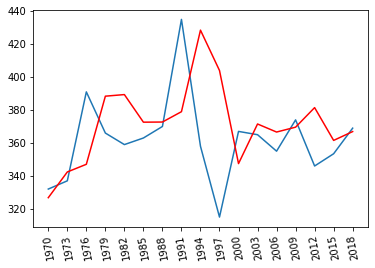

[13.46192846  4.53695885]
[382.43192846]
Artichokes
predicted=230.020368, expected=203.000000
predicted=204.144406, expected=238.000000
predicted=241.158315, expected=265.000000
predicted=279.690539, expected=273.000000
predicted=282.351726, expected=308.000000
predicted=319.845710, expected=344.000000
predicted=364.822231, expected=377.000000
predicted=399.734778, expected=385.000000
predicted=398.152095, expected=413.000000
predicted=426.804733, expected=402.000000
predicted=412.589203, expected=486.000000
predicted=481.332687, expected=431.000000
predicted=501.476646, expected=473.000000
predicted=445.806474, expected=502.000000
predicted=516.017856, expected=567.000000
predicted=577.098433, expected=581.020000
predicted=612.159765, expected=591.120000
rmse:[34.19691001]


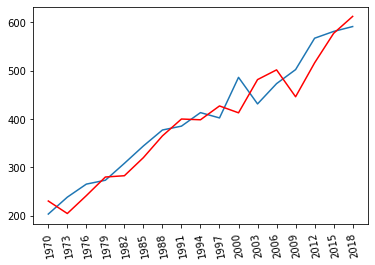

[31.13976535 10.1924015 ]
[622.25976535]
Asparagus
predicted=1011.826114, expected=1057.000000
predicted=1077.167815, expected=1279.000000
predicted=1260.797930, expected=1396.000000
predicted=1410.532939, expected=1370.000000
predicted=1410.433775, expected=1447.000000
predicted=1480.034870, expected=1453.000000
predicted=1491.812023, expected=1700.000000
predicted=1699.168267, expected=1666.000000
predicted=1713.577646, expected=1931.000000
predicted=1914.818961, expected=1856.000000
predicted=1949.534404, expected=1972.000000
predicted=1983.163456, expected=2041.000000
predicted=2084.103853, expected=2211.000000
predicted=2228.277162, expected=2344.000000
predicted=2389.518881, expected=2465.000000
predicted=2513.745645, expected=2510.520000
predicted=2572.084336, expected=2559.270000
rmse:[108.23669819]


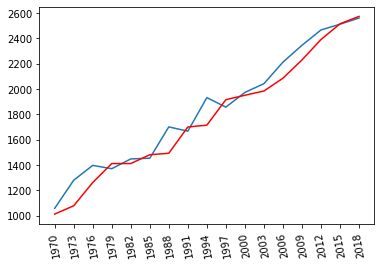

[61.56433611 46.93042192]
[2620.83433611]
BellPeppers
predicted=120.803529, expected=141.000000
predicted=140.683904, expected=183.000000
predicted=204.233902, expected=174.000000
predicted=175.855261, expected=184.000000
predicted=188.715435, expected=201.000000
predicted=207.485565, expected=228.000000
predicted=237.408023, expected=255.000000
predicted=267.334592, expected=316.000000
predicted=348.460843, expected=268.000000
predicted=287.732063, expected=381.000000
predicted=318.194322, expected=383.000000
predicted=438.298433, expected=463.000000
predicted=458.188508, expected=472.000000
predicted=521.666328, expected=485.000000
predicted=494.161504, expected=423.000000
predicted=444.060537, expected=432.160000
predicted=407.345727, expected=453.220000
rmse:[45.54024328]


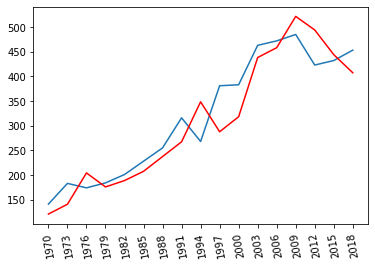

[-24.81427295  12.46860718]
[428.40572705]
Brocolli
predicted=37.887492, expected=44.000000
predicted=42.833403, expected=43.000000
predicted=45.122421, expected=49.000000
predicted=48.114345, expected=52.000000
predicted=50.740406, expected=66.000000
predicted=60.789831, expected=54.000000
predicted=60.750642, expected=55.000000
predicted=61.127415, expected=75.000000
predicted=64.246315, expected=95.000000
predicted=87.083213, expected=109.000000
predicted=111.187442, expected=128.000000
predicted=134.320648, expected=165.000000
predicted=183.688712, expected=171.000000
predicted=182.602739, expected=187.000000
predicted=193.929027, expected=187.000000
predicted=193.433407, expected=193.930000
predicted=197.280637, expected=200.360000
rmse:[14.26657803]


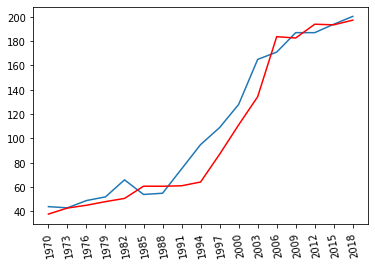

[3.35063723 4.60400976]
[203.71063723]
BrusselSprouts
predicted=94.936517, expected=83.000000
predicted=89.032626, expected=114.000000
predicted=102.894664, expected=116.000000
predicted=112.837875, expected=116.000000
predicted=120.635205, expected=104.000000
predicted=114.020072, expected=84.000000
predicted=99.107025, expected=136.000000
predicted=121.680598, expected=142.000000
predicted=131.540464, expected=121.000000
predicted=133.880971, expected=176.000000
predicted=161.888221, expected=172.000000
predicted=165.050750, expected=166.000000
predicted=176.320257, expected=216.000000
predicted=201.320290, expected=169.000000
predicted=185.310591, expected=253.000000
predicted=225.218171, expected=269.310000
predicted=247.596547, expected=241.530000
rmse:[29.77325916]


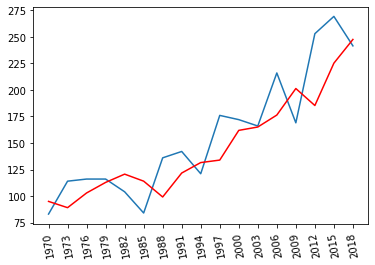

[-21.71345253  15.73863055]
[219.81654747]
Cabbage
predicted=193.020966, expected=215.000000
predicted=222.157523, expected=196.000000
predicted=195.972332, expected=248.000000
predicted=252.218034, expected=245.000000
predicted=247.122838, expected=276.000000
predicted=279.495693, expected=298.000000
predicted=302.762973, expected=322.000000
predicted=327.940959, expected=393.000000
predicted=402.867416, expected=371.000000
predicted=383.246527, expected=355.000000
predicted=364.061179, expected=396.000000
predicted=402.796705, expected=427.000000
predicted=431.026724, expected=474.000000
predicted=481.818883, expected=458.000000
predicted=465.456221, expected=494.000000
predicted=501.874995, expected=501.460000
predicted=510.119159, expected=509.330000
rmse:[31.01629955]


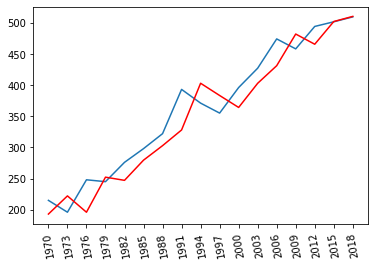

[8.65915924 9.17262599]
[517.98915924]
Carrots
predicted=18.300497, expected=31.000000
predicted=32.547116, expected=18.000000
predicted=18.340264, expected=19.000000
predicted=21.835723, expected=27.000000
predicted=26.562879, expected=24.000000
predicted=23.520510, expected=29.000000
predicted=29.760976, expected=30.000000
predicted=29.837821, expected=34.000000
predicted=34.250785, expected=44.000000
predicted=43.160691, expected=43.000000
predicted=42.622654, expected=52.000000
predicted=52.253697, expected=77.000000
predicted=77.109492, expected=81.000000
predicted=79.913860, expected=151.000000
predicted=159.232293, expected=172.000000
predicted=216.647218, expected=180.230000
predicted=188.553872, expected=224.880000
rmse:[23.1701547]


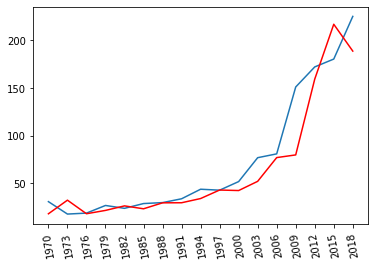

[8.32387186 5.51403013]
[233.20387186]
Cauliflower
predicted=67.771977, expected=49.000000
predicted=65.039960, expected=58.000000
predicted=62.526685, expected=56.000000
predicted=55.651916, expected=63.000000
predicted=65.016616, expected=57.000000
predicted=58.025727, expected=54.000000
predicted=58.460871, expected=77.000000
predicted=76.749902, expected=101.000000
predicted=94.138748, expected=93.000000
predicted=88.462392, expected=121.000000
predicted=122.967947, expected=109.000000
predicted=108.209167, expected=108.000000
predicted=114.450010, expected=114.000000
predicted=116.636323, expected=152.000000
predicted=148.530145, expected=132.000000
predicted=130.967855, expected=128.530000
predicted=138.798182, expected=127.500000
rmse:[16.13098812]


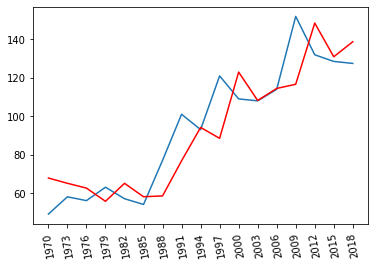

[10.26818203  2.70793982]
[137.76818203]
Celery
predicted=924.464786, expected=933.000000
predicted=955.108715, expected=955.000000
predicted=979.499568, expected=974.000000
predicted=997.825374, expected=1012.000000
predicted=1031.920506, expected=1097.000000
predicted=1111.646927, expected=1188.000000
predicted=1215.485485, expected=1291.000000
predicted=1331.194564, expected=1310.000000
predicted=1353.761232, expected=1453.000000
predicted=1474.059524, expected=1587.000000
predicted=1661.008161, expected=1710.000000
predicted=1791.431215, expected=1785.000000
predicted=1855.854904, expected=1924.000000
predicted=1991.293456, expected=1943.000000
predicted=2017.742508, expected=2081.000000
predicted=2119.948905, expected=2155.740000
predicted=2242.082704, expected=2194.690000
rmse:[57.43069924]


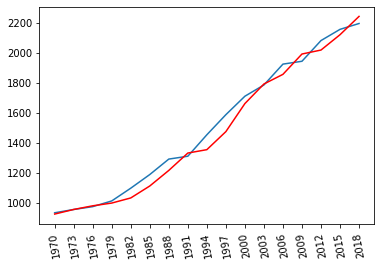

[86.34270408 60.74244771]
[2281.03270408]
Cucumbers
predicted=98.072340, expected=109.000000
predicted=109.585137, expected=119.000000
predicted=121.176260, expected=108.000000
predicted=114.151542, expected=111.000000
predicted=113.333924, expected=111.000000
predicted=113.972114, expected=117.000000
predicted=118.532139, expected=141.000000
predicted=139.518316, expected=115.000000
predicted=128.042895, expected=145.000000
predicted=132.557555, expected=145.000000
predicted=146.976344, expected=147.000000
predicted=150.586606, expected=142.000000
predicted=148.781301, expected=153.000000
predicted=152.202301, expected=160.000000
predicted=160.066866, expected=175.000000
predicted=172.321438, expected=175.070000
predicted=179.203810, expected=172.390000
rmse:[11.84169639]


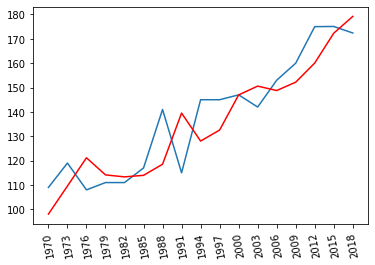

[4.13380997 2.83889181]
[176.52380997]
Eggplant
predicted=14.434637, expected=15.000000
predicted=15.029500, expected=14.000000
predicted=14.152536, expected=15.000000
predicted=15.724773, expected=15.000000
predicted=15.248994, expected=11.000000
predicted=12.859870, expected=10.000000
predicted=12.142111, expected=11.000000
predicted=11.492626, expected=12.000000
predicted=11.830943, expected=12.000000
predicted=12.043655, expected=11.000000
predicted=11.566219, expected=13.000000
predicted=13.308407, expected=10.000000
predicted=10.453307, expected=9.000000
predicted=10.536024, expected=12.000000
predicted=11.967050, expected=12.000000
predicted=11.216247, expected=11.970000
predicted=12.325192, expected=11.190000
rmse:[1.72609638]


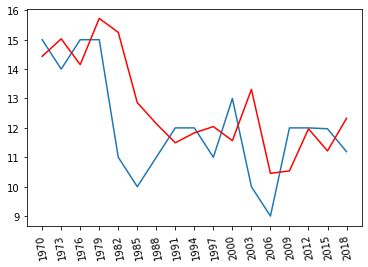

[0.35519188 0.27157761]
[11.54519188]
Escarole
predicted=294.986629, expected=331.000000
predicted=322.631200, expected=346.000000
predicted=350.493167, expected=465.000000
predicted=459.808984, expected=495.000000
predicted=469.909546, expected=499.000000
predicted=507.460571, expected=440.000000
predicted=457.947320, expected=431.000000
predicted=463.337332, expected=406.000000
predicted=420.615351, expected=385.000000
predicted=401.514783, expected=418.000000
predicted=434.516888, expected=423.000000
predicted=426.750164, expected=449.000000
predicted=459.528431, expected=670.000000
predicted=689.943371, expected=586.000000
predicted=561.084423, expected=339.000000
predicted=410.631726, expected=314.080000
predicted=456.999244, expected=385.710000
rmse:[92.86311737]


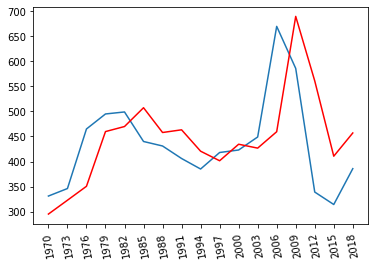

[142.91924427  40.71662303]
[528.62924427]
Garlic
predicted=104.285296, expected=92.000000
predicted=96.322899, expected=119.000000
predicted=116.088558, expected=110.000000
predicted=114.614923, expected=155.000000
predicted=145.460115, expected=178.000000
predicted=179.895637, expected=196.000000
predicted=200.732836, expected=220.000000
predicted=224.940984, expected=257.000000
predicted=264.730686, expected=223.000000
predicted=238.058986, expected=236.000000
predicted=236.464481, expected=292.000000
predicted=289.916427, expected=302.000000
predicted=305.507060, expected=295.000000
predicted=302.882144, expected=266.000000
predicted=276.390054, expected=211.000000
predicted=214.054010, expected=221.390000
predicted=228.259106, expected=224.440000
rmse:[30.52602717]


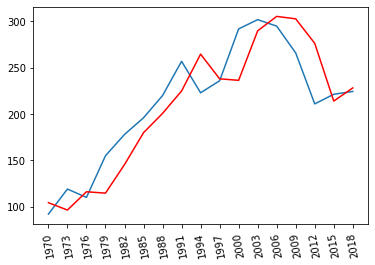

[6.86910553 4.34112073]
[231.30910553]
HeadLettuce
predicted=4.897424, expected=6.000000
predicted=5.754467, expected=9.000000
predicted=9.093061, expected=10.000000
predicted=9.856088, expected=10.000000
predicted=10.134963, expected=10.000000
predicted=10.282255, expected=11.000000
predicted=11.369604, expected=11.280000
predicted=11.449136, expected=11.650000
rmse:[1.28326507]


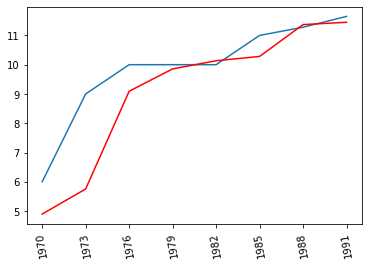

[0.16913592 0.27887618]
[11.81913592]
Kale
predicted=62.144894, expected=59.000000
predicted=66.717986, expected=62.000000
predicted=65.368305, expected=72.000000
predicted=78.302332, expected=68.000000
predicted=75.677659, expected=66.000000
predicted=64.182182, expected=69.000000
predicted=70.104131, expected=80.000000
predicted=86.506153, expected=88.000000
predicted=94.236579, expected=90.000000
predicted=92.332672, expected=96.000000
predicted=99.999618, expected=99.000000
predicted=102.000649, expected=105.000000
predicted=109.094334, expected=119.000000
predicted=128.061060, expected=126.000000
predicted=132.098122, expected=139.000000
predicted=147.603226, expected=145.100000
predicted=151.868453, expected=153.700000
rmse:[5.94244692]


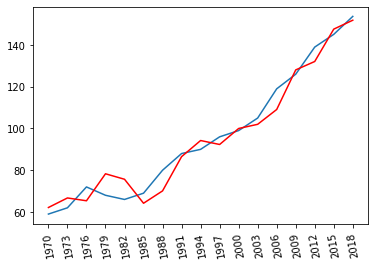

[6.76845334 5.38606795]
[160.46845334]
Mushrooms
predicted=90.975533, expected=116.000000
predicted=110.815110, expected=110.000000
predicted=112.048310, expected=115.000000
predicted=119.932550, expected=124.000000
predicted=125.630100, expected=131.000000
predicted=132.418120, expected=95.000000
predicted=107.154696, expected=139.000000
predicted=136.711695, expected=100.000000
predicted=116.384648, expected=96.000000
predicted=109.969217, expected=130.000000
predicted=119.826673, expected=129.000000
predicted=125.134227, expected=128.000000
predicted=133.821774, expected=116.000000
predicted=126.250824, expected=160.000000
predicted=147.557329, expected=170.250000
predicted=159.204110, expected=157.810000
rmse:[21.39745967]


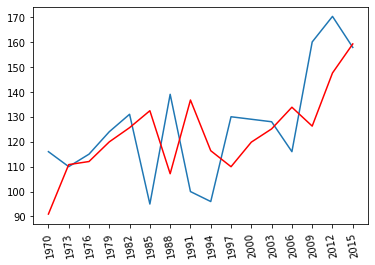

[-11.0458895    7.76489463]
[146.7641105]
Okra
predicted=874.185781, expected=755.000000
predicted=840.859338, expected=787.000000
predicted=828.165898, expected=817.000000
predicted=827.933173, expected=1105.000000
predicted=1017.766760, expected=1177.000000
predicted=1142.479648, expected=936.000000
predicted=1047.799621, expected=916.000000
predicted=1015.602919, expected=1083.000000
predicted=1065.662329, expected=778.000000
predicted=883.938313, expected=861.000000
predicted=940.857560, expected=1036.000000
predicted=972.965295, expected=882.000000
predicted=920.280118, expected=1093.000000
predicted=1080.818343, expected=1106.000000
predicted=1071.026771, expected=1072.000000
predicted=1117.604420, expected=1037.030000
predicted=1095.230306, expected=1082.630000
rmse:[137.54574309]


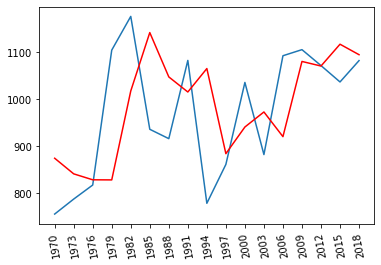

[58.20030555 18.39283134]
[1140.83030555]
Potatoes
predicted=36.114938, expected=41.000000
predicted=40.457821, expected=42.000000
predicted=42.336346, expected=45.000000
predicted=45.176254, expected=45.000000
predicted=45.855246, expected=45.000000
predicted=45.998694, expected=41.000000
predicted=42.859913, expected=51.000000
predicted=49.225145, expected=52.000000
predicted=52.006740, expected=51.000000
predicted=52.378522, expected=53.000000
predicted=53.707020, expected=51.000000
predicted=52.541809, expected=60.000000
predicted=58.552084, expected=74.000000
predicted=72.027973, expected=83.000000
predicted=84.614547, expected=90.000000
predicted=92.377058, expected=91.610000
predicted=93.598328, expected=93.990000
rmse:[5.87200828]


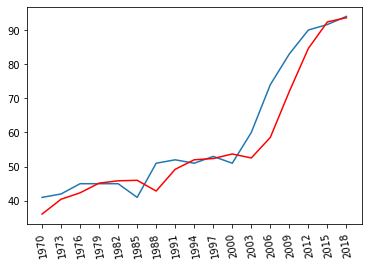

[1.98832811 1.48480949]
[95.97832811]
Radishes
predicted=58.252141, expected=58.000000
predicted=58.889413, expected=60.000000
predicted=61.354771, expected=62.000000
predicted=63.373559, expected=70.000000
predicted=70.823507, expected=79.000000
predicted=81.041127, expected=83.000000
predicted=85.642290, expected=121.000000
predicted=126.250332, expected=120.000000
predicted=136.436473, expected=127.000000
predicted=128.711518, expected=132.000000
predicted=135.689564, expected=139.000000
predicted=142.273928, expected=160.000000
predicted=164.325619, expected=170.000000
predicted=178.344216, expected=172.000000
predicted=176.805168, expected=191.000000
predicted=194.604270, expected=195.810000
predicted=203.458692, expected=199.410000
rmse:[11.17341878]


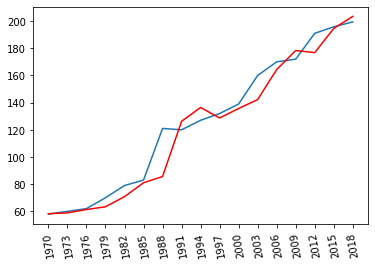

[7.64869175 4.17411004]
[207.05869175]
SnapBeans
predicted=544.236542, expected=545.000000
predicted=570.983413, expected=580.000000
predicted=593.643284, expected=591.000000
predicted=611.597308, expected=632.000000
predicted=644.592913, expected=607.000000
predicted=634.928384, expected=642.000000
predicted=643.568314, expected=698.000000
predicted=712.295702, expected=684.000000
predicted=710.573762, expected=742.000000
predicted=744.426939, expected=807.000000
predicted=822.873821, expected=888.000000
predicted=918.961572, expected=915.000000
predicted=948.796740, expected=1067.000000
predicted=1095.974985, expected=1077.000000
predicted=1159.255178, expected=734.000000
predicted=734.033349, expected=816.260000
predicted=1048.904009, expected=816.290000
rmse:[126.24357053]


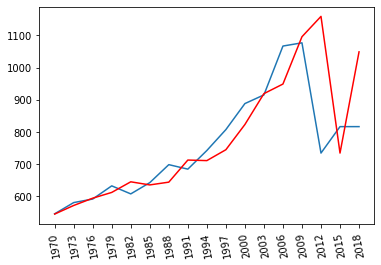

[232.64400875 -42.88687476]
[1048.93400875]
Squash
predicted=2103.434046, expected=2054.000000
predicted=2128.168743, expected=2098.000000
predicted=2128.213476, expected=2187.000000
predicted=2223.503678, expected=2361.000000
predicted=2398.200105, expected=2460.000000
predicted=2524.332845, expected=2622.000000
predicted=2669.008922, expected=3378.000000
predicted=3444.298482, expected=3287.000000
predicted=3514.378025, expected=3377.000000
predicted=3415.294712, expected=3389.000000
predicted=3461.756101, expected=3435.000000
predicted=3491.798404, expected=3468.000000
predicted=3530.730062, expected=3938.000000
predicted=3960.007256, expected=3943.000000
predicted=4079.798209, expected=4093.000000
predicted=4145.507594, expected=4229.800000
predicted=4307.101227, expected=4282.310000
rmse:[211.62991709]


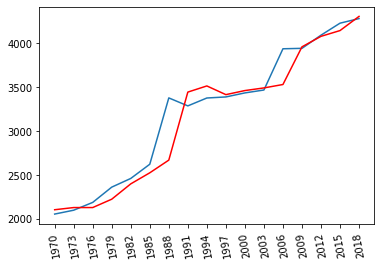

[77.3012271  81.96879017]
[4359.6112271]
Tomatoes


In [36]:
from pandas import read_csv
from pandas import datetime
import pandas as pd
from matplotlib import pyplot
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tools.eval_measures import rmse
from pandas.tseries.offsets import DateOffset
import numpy
import pyodbc
conn_str = (
    r'DRIVER={SQL Server};'
    r'SERVER=unagisqlserver.database.windows.net;'
    r'DATABASE=unagi;'
    r'UID=Dhanush;'
    r'PWD=Dan@123#;'
)
location="VegetableImports"
Vegetable=["Artichokes","Asparagus","BellPeppers","Brocolli","BrusselSprouts","Cabbage","Carrots","Cauliflower","Celery","Cucumbers"
          ,"Eggplant","Escarole","Garlic","HeadLettuce","Kale","Mushrooms","Okra","Potatoes","Radishes","SnapBeans","Squash","Tomatoes"]
for j in range(0,len(Vegetable)):
    cnxn=pyodbc.connect(conn_str)
    cursor=cnxn.cursor()
    cursor.execute("SELECT ImportYear,Imports FROM dbo.{} WHERE Vegetable='{}'".format(location,Vegetable[j]))
    output=[]
    while 1:
        row=cursor.fetchone()
        if not row:
            break
        output.append(row.ImportYear)
        output.append(row.Imports)
    length=len(output)
    f=open("{}Imports.csv".format(Vegetable[j]),"w")
    f.write("ImportYear,Imports")
    f.write("\n")
    i=0
    while i<length:
        f.write("{},{}".format(output[i],output[i+1]))
        f.write("\n")
        i=i+2
    f.close()
    cnxn.close()
    def parser(x):
        return pd.datetime.strptime(x, '%Y')
    series = pd.read_csv('{}Imports.csv'.format(Vegetable[j]), parse_dates=[0], index_col=0 ,date_parser=parser)
    series.dropna(inplace=True)
    X = series.values
    size = int(len(X) * 0.67)
    train, test = X[0:size], X[size:len(X)]
    Htrain = [x for x in train]
    predictions = list()
    for t in range(len(test)):
        model = ARIMA(Htrain, order=(2,1,0))
        model_fit = model.fit(disp=0)
        predict = model_fit.forecast()[0]
        predictions.append(predict)
        obs = test[t]
        Htrain.append(obs)
        print('predicted=%f, expected=%f' % (predict, obs)) 
    print("rmse:{}".format(rmse(test, predictions)))
    pyplot.plot(test)
    pyplot.xticks([0, 1, 2,3,4,5,6,7,8,9,10,11,12,13,14,15,16], ['1970','1973','1976','1979','1982','1985','1988','1991','1994','1997','2000','2003','2006','2009','2012','2015','2018'],rotation=100)
    pyplot.plot(predictions, color='red')
    pyplot.show()
    diffPred = model_fit.predict(start=len(X),end=len(X))
    print(diffPred)
    final = diffPred[0] + series.values[-1]
    print(final)
    print(Vegetable[j])
    cnxn=pyodbc.connect(conn_str)
    cursor=cnxn.cursor()
    sql = "INSERT INTO dbo.{} (Vegetable,ImportYear,Imports) VALUES ('{}',2021, ?)".format(location,Vegetable[j])
    cursor.execute(sql,final[0])
    cnxn.commit()